In [8]:
# installing the package to open my tif file

In [5]:
pip install rasterio

  Using cached rasterio-1.3.9-cp310-cp310-manylinux2014_x86_64.whl (20.6 MB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=c790ad16fb2519eaf780a6781adb3b22ee98fd07909124fe7323445702a979f9
  Stored in directory: /home/jovyan/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm
Note: you may need to restart the kernel to use updated packages.


In [50]:
# Importing packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import utm

In [58]:
## Opening Bathymetry File
filepath_asc = 'bathy_asc_lake_crescent.asc'

## Converted to a Numpy Array
dn_asc = np.genfromtxt(filepath_asc, skip_header = 6, dtype = float, delimiter = ' ')
dn_asc = np.where(dn_asc != -9999)
print(len(dn_asc))
print(dn_asc)

2
(array([  40,   40,   40, ..., 1699, 1699, 1699]), array([2982, 2983, 2984, ..., 2707, 2708, 2709]))


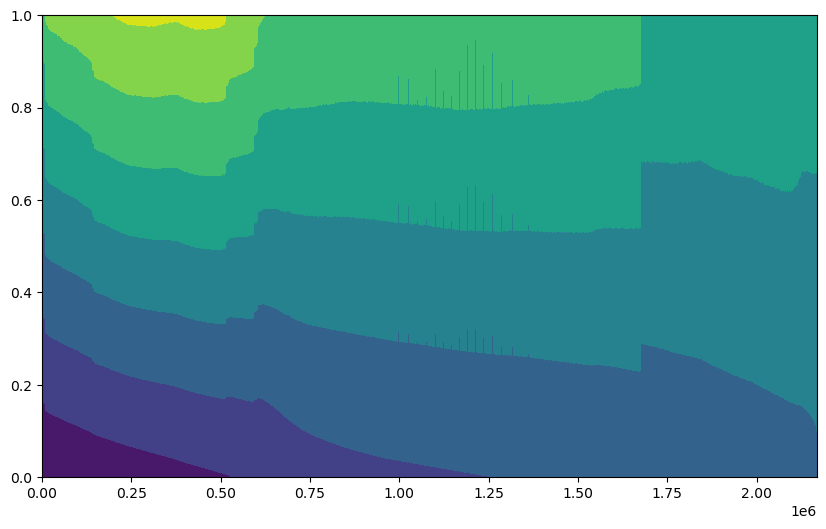

In [57]:
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

cntr = plt.contourf(dn_asc, cmap = 'viridis') 

In [9]:
## Opening acoustic backscatter file
# using https://stackoverflow.com/questions/44534009/plotting-with-rasterio
filepath_tif = 'back_tif_lake_crescent.tif'
img = rasterio.open(filepath_tif)

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [23]:
# Setting up NumPy Array
x = np.arange(431687, 444833, 3)
y = np.arange(5321907, 5327181, 3)
print(x)
print('x:', len(x))
print('y:', len(y))

[431687 431690 431693 ... 444824 444827 444830]
x (lon): 4382
y (lat): 1758


In [25]:
# Converting Numpy Array to xr
data_xr = xr.DataArray(data = dn_asc, dims = ['y', 'x'], coords = {'x':x, 'y':y})
# Taking out -9999 variables
data_xr = data_xr.where(data_xr != -9999)
display(data_xr)

<xarray.DataArray (y: 1758, x: 4382)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) int64 431687 431690 431693 431696 ... 444824 444827 444830
  * y        (y) int64 5321907 5321910 5321913 ... 5327172 5327175 5327178

/tmp/ipykernel_70/790827615.py:8: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = plt.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)


<a list of 13 text.Text objects>

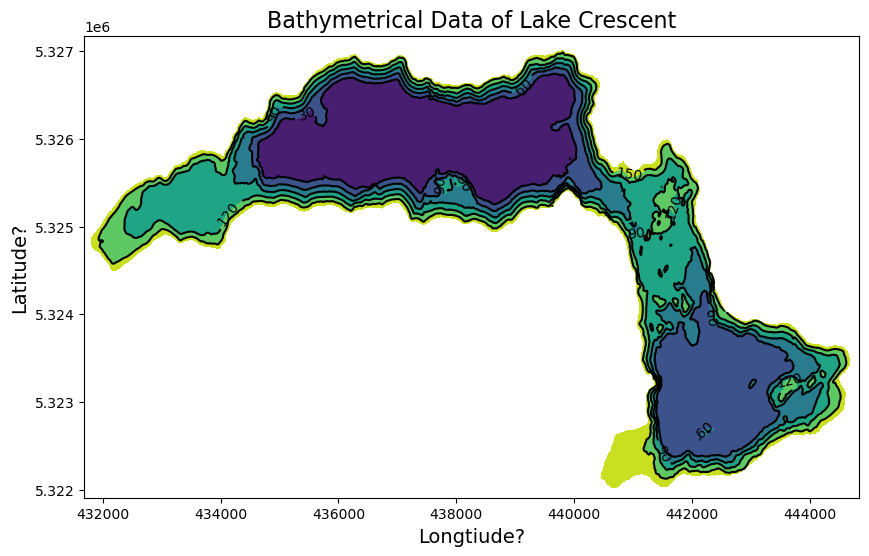

In [12]:
# Bathymetry

## Kathy's Feedback - bathymetry for contour and color for acoustic backscatter
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

cntr = plt.contourf(x, y, data_xr, cmap = 'viridis', levels = 5) 
cntr_lines = plt.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)
plt.xlabel('Longtiude?', fontsize = 14)
plt.ylabel('Latitude?', fontsize = 14)
plt.title('Bathymetrical Data of Lake Crescent', fontsize = 16)
plt.clabel(cntr_lines)

In [ ]:
# converting my UTM coordinates to lat-lon 
zone_num = 10
zone_let = 'U'
lat = []
lon = []
df = ...
for i in df:
    lat = utm.to_latlon(df[], df[], zone_num, zone_let) [0]
    lon = utm.to_latlon(df[], df[], zone_num, zone_let) [1]

In [46]:
# Using the global cartopy map
lat = data_xr.x.values
lon = data_xr.y.values
# fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree())
## Adding in a color map
cntr = plt.contourf(lat, lon, data_xr, transform = ccrs.PlateCarree(), zorder = 2, alpha = 0.65, cmap = 'viridis') 
# cntr_lines = plt.contour(lat, lon, data_xr, colors = 'black', levels = 5, linewith = 1, transform = ccrs.PlateCarree())
# plt.clabel(cntr_lines)
## Adding in features
ax.coastlines(resolution = '110m', color = 'k')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
# ax.set_extent([-123.9, -123.7, 48.0, 48.1], crs = ccrs.PlateCarree())

Text(0.5, 1.0, 'Acoustic Backscatter Data of Lake Crescent')

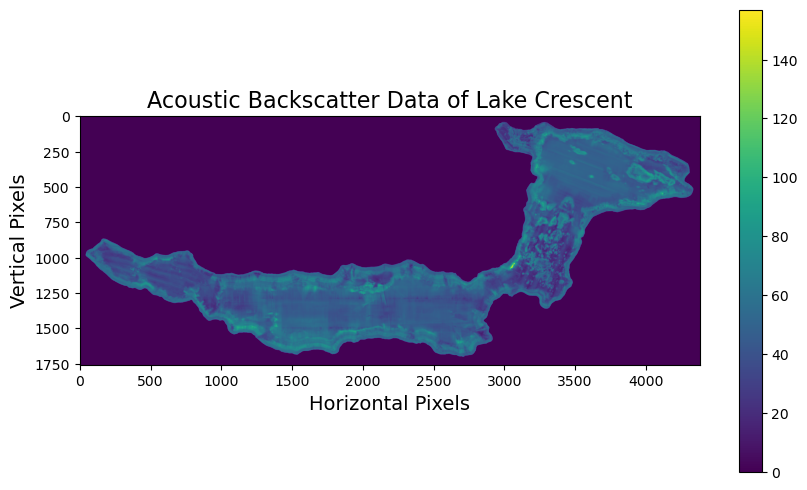

In [8]:
# Acoustic Backscatter Plot
fig,ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

plt.imshow(img.read(1), cmap = 'viridis')
plt.colorbar()
plt.xlabel('Horizontal Pixels', fontsize = 14)
plt.ylabel('Vertical Pixels', fontsize = 14)
plt.title('Acoustic Backscatter Data of Lake Crescent', fontsize = 16)

In [19]:
img.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

/tmp/ipykernel_101/91774156.py:11: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr = ax.contourf(x, y, data_xr, cmap = 'viridis', levels = 5, linewith = 1)
/tmp/ipykernel_101/91774156.py:12: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = ax.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)


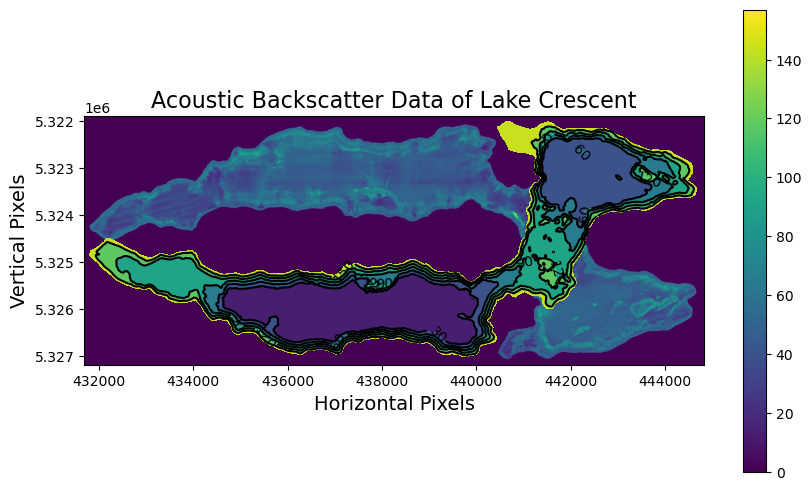

In [30]:
# Combining Graphs
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

extent = x.min(), x.max(), y.min(), y.max()
plt.imshow(img.read(1), cmap = 'viridis', extent = extent)
plt.colorbar()
plt.xlabel('Horizontal Pixels', fontsize = 14)
plt.ylabel('Vertical Pixels', fontsize = 14)
plt.title('Acoustic Backscatter Data of Lake Crescent', fontsize = 16)
cntr = ax.contourf(x, y, data_xr, cmap = 'viridis', levels = 5, linewith = 1) 
cntr_lines = ax.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)
ax.invert_yaxis()
plt.clabel(cntr_lines)

# Using https://futurestud.io/tutorials/matplotlib-save-plots-as-file
plt.savefig('failed_graph_2.png')

/tmp/ipykernel_101/1116837695.py:11: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr = p2.contourf(x, y, data_xr, cmap = 'viridis', levels = 5, linewith = 1)
/tmp/ipykernel_101/1116837695.py:12: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = p2.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)


<a list of 13 text.Text objects>

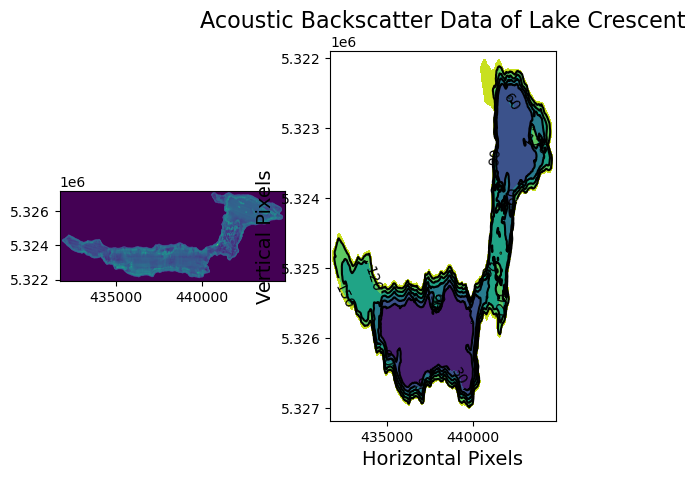

In [28]:
# Combining Graphs
## Using https://stackoverflow.com/questions/72908430/how-to-invert-y-axis-in-subplot-python
axes,(p1, p2) = plt.subplots(1, 2)
ax = plt.gca()

extent = x.min(), x.max(), y.min(), y.max()
p1.imshow(img.read(1), cmap = 'viridis', extent = extent)
plt.xlabel('Horizontal Pixels', fontsize = 14)
plt.ylabel('Vertical Pixels', fontsize = 14)
plt.title('Acoustic Backscatter Data of Lake Crescent', fontsize = 16)
cntr = p2.contourf(x, y, data_xr, cmap = 'viridis', levels = 5, linewith = 1) 
cntr_lines = p2.contour(x, y, data_xr, colors = 'black', levels = 5, linewith = 1)
p2.invert_yaxis()
p2.clabel(cntr_lines)

plt.savefig('failed_graph_1.png')

/tmp/ipykernel_70/2971402465.py:11: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = plt.contour(x, y, data_xr, colors = 'white', levels = 5, linewith = 1)


<a list of 13 text.Text objects>

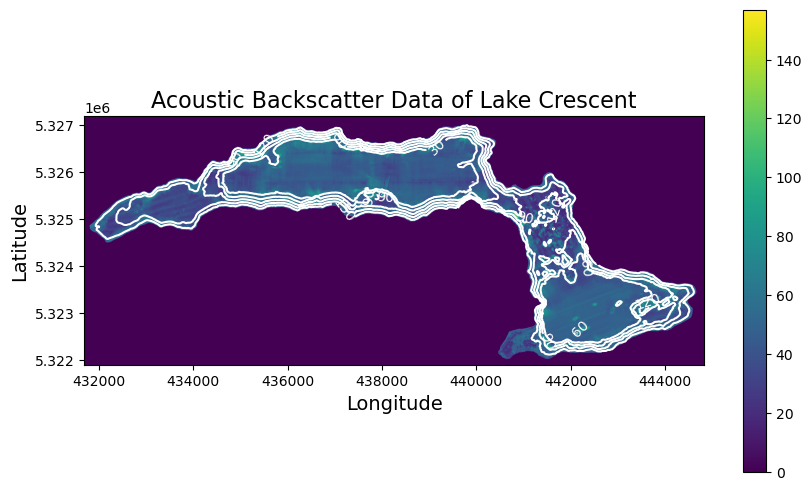

In [15]:
# Combining Graphs
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

extent = x.min(), x.max(), y.min(), y.max()
plt.imshow(np.flip(img.read(1), axis = 0), cmap = 'viridis', extent = extent)
plt.colorbar()
plt.xlabel('Longitude', fontsize = 14)
plt.ylabel('Latitude', fontsize = 14)
plt.title('Acoustic Backscatter Data of Lake Crescent', fontsize = 16)
cntr_lines = plt.contour(x, y, data_xr, colors = 'white', levels = 5, linewith = 1)
plt.clabel(cntr_lines)